In [7]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels) =  keras.datasets.cifar10.load_data()
train_images,test_images = train_images/255.0,test_images/255.0

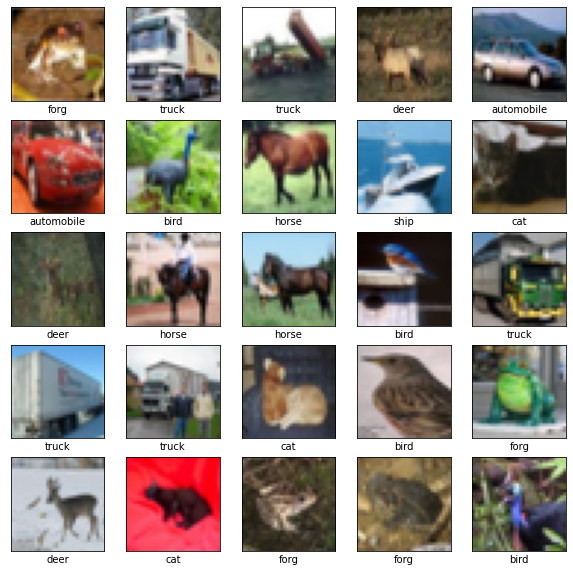

In [3]:
class_name = ['airoplane','automobile','bird','cat','deer','dog','forg','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_name[train_labels[i][0]])
    
plt.show()

In [8]:
#Create convolution base
def create_model():
    model =  keras.Sequential([
                keras.layers.InputLayer(input_shape=(32,32,3)),
                keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                keras.layers.MaxPooling2D(pool_size=(2,2)),
                keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                keras.layers.MaxPooling2D(pool_size=(2,2)),
                keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                keras.layers.Flatten(),
                keras.layers.Dense(64,activation='relu'),
                keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    
    return model
                        
                        
                        
base_model = create_model()
history = base_model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))
base_model.summary()


2021-07-08 07:35:24.436494: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5295 - accuracy: 0.4452 - val_loss: 1.2161 - val_accuracy: 0.5610
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1722 - accuracy: 0.5850 - val_loss: 1.0888 - val_accuracy: 0.6128
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0313 - accuracy: 0.6378 - val_loss: 1.0306 - val_accuracy: 0.6374
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9318 - accuracy: 0.6751 - val_loss: 0.9554 - val_accuracy: 0.6675
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8544 - accuracy: 0.7021 - val_loss: 0.9736 - val_accuracy: 0.6613
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8025 - accuracy: 0.7185 - val_loss: 0.8934 - val_accuracy: 0.6935
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7520 - accuracy: 0.7366 - val_loss: 0.8830 -

In [9]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=30,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.2)
train_generator = datagen.flow(train_images,train_labels)
test_generator = datagen.flow(test_images,test_labels)

base_model.evaluate(test_generator)

313/313 [==============================] - 4s 13ms/step - loss: 1.9786 - accuracy: 0.4118


[1.9785536527633667, 0.41179999709129333]

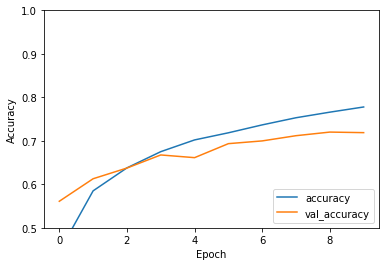

In [10]:
#Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')


 
